In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [5]:
url = 'https://raw.githubusercontent.com/ovlathkar/Project_using_KNN/refs/heads/main/iphone_purchase_records.csv'
data = pd.read_csv(url)
data.head(10)

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
#Encoding
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Gender']

,Gender
0,0
1,0
2,1
3,1
4,0
...,...
395,1
396,0
397,1
398,0


In [8]:
X = data.drop('Purchase Iphone', axis=1)
y = data['Purchase Iphone']

print("Features Table\n", X)
print("Target Table\n", y)

Features Table
      Gender  Age  Salary
0         0   19   19000
1         0   35   20000
2         1   26   43000
3         1   27   57000
4         0   19   76000
..      ...  ...     ...
395       1   46   41000
396       0   51   23000
397       1   50   20000
398       0   36   33000
399       1   49   36000

[400 rows x 3 columns]
Target Table
 0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchase Iphone, Length: 400, dtype: int64


In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Splitting done!!!")
print(X_train)
print(X_test)
print(y_train)
print(y_test)

Splitting done!!!
     Gender  Age  Salary
157       0   29   75000
109       1   38   80000
17        0   45   26000
347       1   54  108000
24        0   46   23000
..      ...  ...     ...
71        1   24   27000
106       1   26   35000
270       1   43  133000
348       0   39   77000
102       1   32   86000

[280 rows x 3 columns]
     Gender  Age  Salary
209       1   46   22000
280       1   59   88000
33        1   28   44000
210       1   48   96000
93        1   29   28000
..      ...  ...     ...
60        0   27   20000
79        1   26   17000
285       1   37   93000
305       0   42   54000
281       0   35   61000

[120 rows x 3 columns]
157    0
109    0
17     1
347    1
24     1
      ..
71     0
106    0
270    0
348    0
102    0
Name: Purchase Iphone, Length: 280, dtype: int64
209    0
280    1
33     0
210    1
93     0
      ..
60     0
79     0
285    1
305    0
281    0
Name: Purchase Iphone, Length: 120, dtype: int64


In [10]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Feature scaling done!!!")

Feature scaling done!!!


In [11]:
#knn
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

In [12]:
print("Training Completed")
print("Accuracy:", accuracy_score(y_test, y_pred))

Training Completed
Accuracy: 0.9166666666666666


In [13]:
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        73
           1       0.89      0.89      0.89        47

    accuracy                           0.92       120
   macro avg       0.91      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



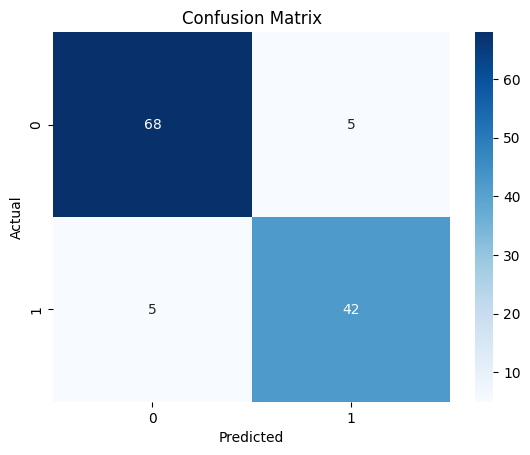

In [14]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [15]:
correlation_matrix = data.corr()
print("Correlation Matrix\n", correlation_matrix)

Correlation Matrix
                    Gender       Age    Salary  Purchase Iphone
Gender           1.000000  0.073741  0.060435         0.042469
Age              0.073741  1.000000  0.155238         0.622454
Salary           0.060435  0.155238  1.000000         0.362083
Purchase Iphone  0.042469  0.622454  0.362083         1.000000


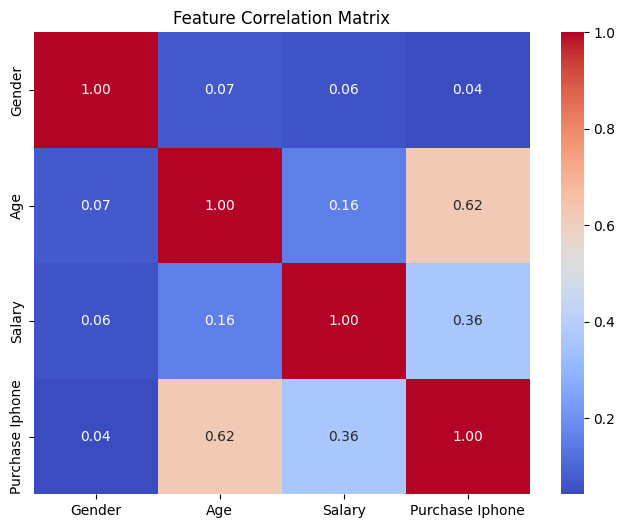

In [16]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

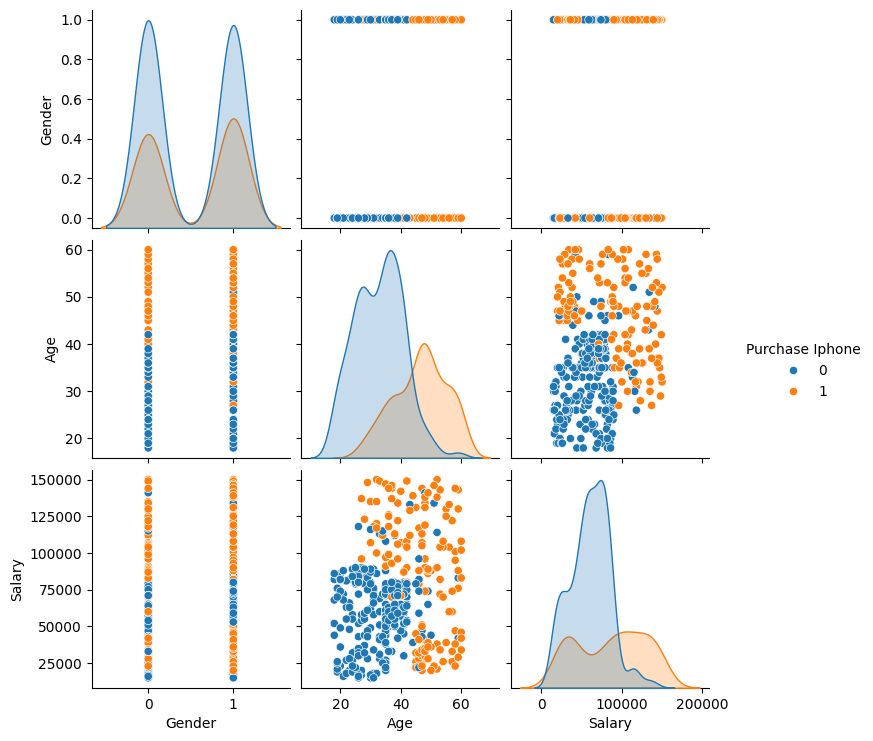

In [17]:
sns.pairplot(data, hue='Purchase Iphone')
plt.show()

In [18]:
print("Table showing actual and predicted values")
compare_table = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(compare_table)

Table showing actual and predicted values
     Actual  Predicted
209       0          1
280       1          1
33        0          0
210       1          1
93        0          0
..      ...        ...
60        0          0
79        0          0
285       1          0
305       0          0
281       0          0

[120 rows x 2 columns]


In [19]:
#for new data
new_data = pd.DataFrame({'Gender': [0], 'Age': [25], 'Salary': [100000]})
new_data

,Gender,Age,Salary
0,0,25,100000


In [20]:
new_data_scaled = scaler.transform(new_data)
new_data_scaled

array([[-1.02166316, -1.23553451,  0.86788431]])

In [22]:
new_prediction = knn.predict(new_data_scaled)
print("Prediction for new data:", new_prediction)

Prediction for new data: [0]


In [23]:
# Multiple customer entries
new_customers = pd.DataFrame({
    'Gender': [1, 0],
    'Age': [22, 45],
    'Salary': [58000, 120000]
})

# Scale
new_customers_scaled = scaler.transform(new_customers)

# Predict
predictions = knn.predict(new_customers_scaled)

# Show predictions
new_customers['Predicted_Purchase'] = predictions
new_customers['Predicted_Purchase'] = new_customers['Predicted_Purchase'].map({1: 'Yes', 0: 'No'})
print(new_customers)

   Gender  Age  Salary Predicted_Purchase
0       1   22   58000                 No
1       0   45  120000                Yes
